In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
#Load Cleansed Data
df_analysis_internal_restrictions = pd.read_csv('/content/New_Cleansed_Data.csv')

In [12]:
#Transform Internal Restriction Info
df_analysis_internal_restrictions.loc[df_analysis_internal_restrictions['InternalRestrictions'] == 0, 'InternalRestrictionsDetail'] = 'No_Measure'
df_analysis_internal_restrictions.loc[df_analysis_internal_restrictions['InternalRestrictions'] == 1, 'InternalRestrictionsDetail'] = 'Recommended_Restriction'
df_analysis_internal_restrictions.loc[df_analysis_internal_restrictions['InternalRestrictions'] == 2, 'InternalRestrictionsDetail'] = 'Required_Restriction'

In [13]:
#Select Specific Columns
df_analysis_internal_restrictions = df_analysis_internal_restrictions[[
    'State' ,
    'Date' ,
    'InternalRestrictionsDetail'
    ]]

In [14]:
df_graph_internal_restrictions = df_analysis_internal_restrictions.groupby(['State','InternalRestrictionsDetail'])['Date'].count().reset_index(name= 'Counts')

In [15]:
df1_graph_internal_restrictions = pd.pivot_table(df_graph_internal_restrictions,values = 'Counts', index=['State'], columns = ['InternalRestrictionsDetail']).reset_index()

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Days')

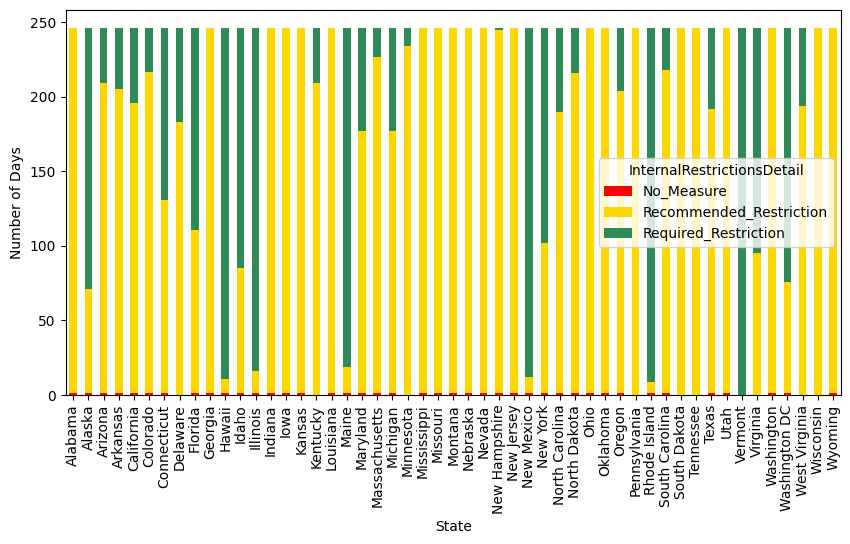

In [21]:
colors =["Red", "Gold" ,"SeaGreen"]
df1_graph_internal_restrictions.plot(x= "State", y= [ "No_Measure","Recommended_Restriction", "Required_Restriction"], kind = "bar", stacked = "true", figsize= (10,5), color=colors)
plt.xlabel('State')
plt.ylabel('Number of Days')